In [2]:
import glob, re
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import time as ttime

import pandas as pd
from scipy import stats

from IPython.display import clear_output

def mm(*M_list):
    res = M_list[0]
    for M in M_list[1:]: res = np.matmul(res,M)
    return res
#%matplotlib widget

In [3]:
!pip3 install opencv-python
import cv2
from numpy import linalg as la

In [4]:
from databroker import Broker
db = Broker.named('tes')
%time hdr = db[9585]
tbl = hdr.table()

OBJECT CACHE: Will use up to 121_499_070_873 bytes (15% of total physical RAM)


CPU times: user 1.45 s, sys: 98 ms, total: 1.55 s
Wall time: 1.58 s


In [5]:
tbl.time.values.astype(str)

array(['2022-05-26T20:53:24.403696384', '2022-05-26T20:53:25.622542592',
       '2022-05-26T20:53:26.829016320', ...,
       '2022-05-27T13:40:56.841859840', '2022-05-27T13:40:58.050133504',
       '2022-05-27T13:40:59.245572864'], dtype='<U48')

In [6]:
from datetime import datetime

#datetime()

tbl['timestamp'] = [datetime.fromisoformat(iso[:-10]).timestamp() for iso in tbl.time.values.astype(str)]

In [7]:
rmd  = tbl[['kbh_ush','kbh_dsh','kbv_ush','kbv_dsh']]

In [8]:
prefix = '/nsls2/users/tmorris/datasets/tes/220526x50000'

#ims = np.array([sp.ndimage.gaussian_filter(im,sigma=1) for im in np.load(f'{prefix}/raw_averaged.npy')])
%time ims = np.load(f'{prefix}/raw_averaged.npy').astype(np.float32)

#ims = ims[:,0::2] + ims[:,1::2]
#ims = ims[:,:,0::2] + ims[:,:,1::2]

nf, nx, ny = ims.shape
nf, nx, ny

CPU times: user 40.2 s, sys: 45.3 s, total: 1min 25s
Wall time: 1min 24s


(50000, 480, 704)

In [9]:
peaks = ims.max(axis=(1,2))

%time mi, mj = np.unravel_index(ims.reshape(-1,nx*ny).argmax(axis=1),shape=(nx,ny))
mi_min, mi_max = np.percentile(mi, q=[2,98])
mj_min, mj_max = np.percentile(mj, q=[2,98])

good  = True
good &= peaks > np.percentile(peaks, q=2)
good &= mi > mi_min
good &= mi < mi_max
good &= mj > mj_min
good &= mj < mj_max

ims = ims[good]
rmd = rmd.loc[good]

CPU times: user 14.5 s, sys: 59.9 ms, total: 14.5 s
Wall time: 14.4 s


In [10]:
ims.shape, rmd.shape

((45790, 480, 704), (45790, 4))

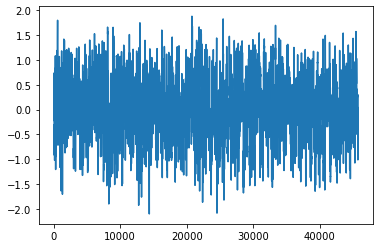

In [11]:
nmd  = rmd.copy()
nmd -= np.percentile(nmd,q=5,axis=0)
nmd *= 2 / np.percentile(nmd,q=95,axis=0)
nmd -= 1
plt.figure()
plt.plot(nmd.values[:,3])

In [12]:
%time med = np.mean(ims, axis=0); ims -= med[None,:,:]

CPU times: user 16 s, sys: 200 ms, total: 16.2 s
Wall time: 15.8 s


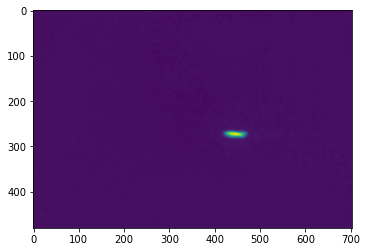

In [13]:
plt.imshow(ims[0])

In [14]:
nmd

,kbh_ush,kbh_dsh,kbv_ush,kbv_dsh
seq_num,,,,
1,-1.113896,-0.023596,0.717250,-0.006747
2,-1.116230,-0.033730,0.755715,-0.037685
3,-1.119937,-0.042739,0.787975,-0.071350
4,-1.123920,-0.049871,0.816617,-0.105288
5,-1.126803,-0.055313,0.843604,-0.137862
...,...,...,...,...
49996,-1.129687,0.009811,0.438383,0.013152
49997,-1.124606,0.009248,0.497424,0.034414
49998,-1.119663,0.004556,0.558843,0.041229
